# Destination's street density INDEX 

This code allows you to estimate:
The street density INDEX at the DESTINATION for only one origin point or for a set of origins. The street density is estimated base on a selection of arcs contained within a 600m buffer around each destination. All the arcs selected in relation to each destination are assumed to be previously estimated.  

## Importing libraries

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib as mpl
import csv
import math

print ("it works")

it works


### Example for only one route

In [2]:
route = 1002
db = gpd.read_file('../Shapes/end_arcs600/R' +"%s" % (route) +'_end_arcs600.shp')
print (db.crs)
db.head()

{'init': 'epsg:3116'}


,OBJECTID,bridge,from_,highway,name,oneway,osmid,to,ID_PhD,Cyclypath,...,vc80,vc60,vc40,vc30,vc5,Hle,Lle,bnocycle,bcycle,geometry
0,33667,None,1814542378,primary,Avenida del Ferrocarril,True,30658250,339054018,33667,0,...,0,128,0.0,0,0,128.229791,0,1,0,"LINESTRING Z (834243.8059 1182094.069399999 0,..."
1,33668,None,339054018,primary,Avenida del Ferrocarril,True,30658250,339054019,33668,0,...,0,55,0.0,0,0,54.695307,0,1,0,LINESTRING Z (834247.8344000001 1182222.217499...
2,30296,None,850874115,unclassified,None,True,71527050,2671726867,30296,0,...,0,0,0.0,0,0,0.000000,0,1,0,LINESTRING Z (833731.2880999995 1181950.7304 0...
3,30299,None,850874117,residential,Carrera 63A,False,261576278,1816091548,30299,0,...,0,0,0.0,279,0,0.000000,279,1,0,LINESTRING Z (833749.7937000003 1181922.180500...
4,38577,None,None,footway,None,None,None,None,38577,0,...,0,0,0.0,0,53,0.000000,53,1,0,LINESTRING Z (834324.8823999995 1182389.5297 0...


In [3]:
db.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 307 entries, 0 to 306
Data columns (total 46 columns):
OBJECTID      307 non-null int64
bridge        13 non-null object
from_         304 non-null object
highway       307 non-null object
name          227 non-null object
oneway        302 non-null object
osmid         302 non-null object
to            304 non-null object
ID_PhD        307 non-null object
Cyclypath     307 non-null int64
Ped_path      307 non-null int64
X_from        307 non-null float64
Y_from        307 non-null float64
Z_from        307 non-null float64
X_to          307 non-null float64
Y_to          307 non-null float64
Z_to          307 non-null float64
slope         307 non-null float64
speed         307 non-null float64
v_80          307 non-null float64
v_60          307 non-null float64
v_40          307 non-null float64
v_30          307 non-null float64
v_5           307 non-null float64
Long          307 non-null float64
Cycle_long    307 non-null 

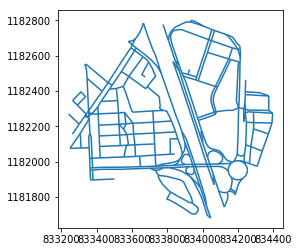

In [4]:
db.plot()

In [5]:
radio = 0.6
area = 3.14159265358979 * radio**2
D_Lstreet = (db['Long']).sum()/1000
D_streetdens = D_Lstreet / area 

In [7]:
print ("D_Lstreet:" + str(D_Lstreet))
print ("D_streetdens:" + str(D_streetdens))

D_Lstreet:24.733079128306873
D_streetdens:21.868843339739048


In [8]:
results = pd.DataFrame ({
        "route":[route],
        "D_Lstreet":[D_Lstreet],
        "D_streetdens":[D_streetdens]})
results.to_csv('../Tables/OUT/R' +"%s" %(route)+'_end_sd600.txt',index=False, header=True)

## Street density estimated for All routes 

The code requires the list of the origin points associated to all the routes. This list is located in the Tables folder. If you move this file out of this folder, please modify the code.   

In [9]:
routes = np.loadtxt('../Tables/Routes.txt',dtype='str')

In [10]:
for i in routes:
    db = gpd.read_file('../Shapes/end_arcs600/R' +"%s" % (i) +'_end_arcs600.shp')
    radio = 0.6
    area = 3.14159265358979 * radio**2
    D_Lstreet = (db['Long']).sum()/1000
    D_streetdens = D_Lstreet / area 
    results = pd.DataFrame ({
            "route":[i],
            "D_Lstreet":[D_Lstreet],
            "D_sttdens":[D_streetdens]})
    results.to_csv('../Tables/OUT/R' +"%s" %(i)+'_end_sd600.txt',index=False, header=True)

This part of the code summarizes the intersection index related to each origin in only one table. Please copy it to a text file and save. 

In [11]:
print ('route,D_Lstreet,D_sttdens')
for i in routes:
    df=np.loadtxt('../Tables/OUT/R' +"%s" %(i)+'_end_sd600.txt', delimiter=',',skiprows=1)
    print ((df[0]),(df[1]),(df[2])) 

route,D_Lstreet,D_sttdens
1002.0 24.733079128306873 21.868843339739048
1006.0 26.1401686196655 23.112983605974527
1009.0 16.660137417108547 14.73079568068372
1050.0 16.93572274099809 14.974466605909287
1052.0 21.618809667095352 19.11522456822823
1079.0 25.1494328077544 22.236980818397786
1100.0 24.85527662835564 21.97688965177368
1101.0 22.88048809032435 20.230793221835356
1102.0 19.04886329847957 16.842893079082295
1104.0 25.00274107677708 22.107276851199188
1124.0 23.94542405120202 21.17240334544646
1128.0 22.76605491077984 20.12961207640074
1132.0 16.38779888039773 14.489995545617386
1134.0 19.04886329847957 16.842893079082295
1137.0 21.781874579723812 19.259405606504156
1147.0 23.98631574145481 21.208559537863763
1151.0 28.39254197813488 25.10451890424617
1381.0 17.30280133504041 15.299035343381833
1392.0 28.168837937217226 24.906721104792414
1397.0 11.756419919256619 10.39495746229841
1398.0 25.564096838356782 22.603624319468775
1399.0 24.35361897226257 21.53332689784531
1401.0 22

5327.0 19.04886329847957 16.842893079082295
5328.0 19.04886329847957 16.842893079082295
5329.0 19.04886329847957 16.842893079082295
5331.0 19.04886329847957 16.842893079082295
5332.0 19.04886329847957 16.842893079082295
5333.0 23.416585366791185 20.704807285878687
5334.0 17.994024215871644 15.910210555951338
5335.0 19.04886329847957 16.842893079082295
5338.0 19.04886329847957 16.842893079082295
5341.0 19.04886329847957 16.842893079082295
5342.0 21.18554194138707 18.732131789180134
5343.0 23.80638402734317 21.049464972753402
5344.0 19.04886329847957 16.842893079082295
5346.0 21.18554194138707 18.732131789180134
5347.0 19.04886329847957 16.842893079082295
5348.0 19.04886329847957 16.842893079082295
5352.0 19.04886329847957 16.842893079082295
5354.0 17.16833777078977 15.180143449402697
5356.0 19.04886329847957 16.842893079082295
5358.0 19.04886329847957 16.842893079082295
5359.0 18.86923097105453 16.68406322992231
5360.0 19.04886329847957 16.842893079082295
5363.0 20.285190315533182 17.93

5730.0 19.43010847989732 17.179987829930077
5731.0 19.04886329847957 16.842893079082295
5734.0 25.781709991161758 22.796036591417238
5739.0 23.59155307927812 20.859512709899672
5742.0 19.04886329847957 16.842893079082295
5743.0 19.04886329847957 16.842893079082295
5744.0 27.176202784896972 24.029038931578274
5747.0 20.285190315533182 17.936046168205294
5748.0 19.04886329847957 16.842893079082295
5749.0 23.24850649785979 20.55619293688021
5750.0 16.535564799100012 14.620649303295071
5751.0 26.36042950413371 23.307736986712907
5753.0 19.04886329847957 16.842893079082295
5755.0 25.35723540819691 22.420718657552094
5756.0 25.71552870618051 22.737519487834245
5757.0 23.04492018384848 20.376183113431548
5758.0 18.86923097105453 16.68406322992231
5759.0 19.04886329847957 16.842893079082295
5760.0 19.04886329847957 16.842893079082295
5763.0 23.202864387901432 20.515836451252337
5765.0 12.917392020672738 11.421482177477081
5772.0 28.06714459947517 24.816804452674848
5774.0 19.04886329847957 16.

8264.0 20.285190315533182 17.936046168205294
8269.0 16.74986654592629 14.810133649520795
8275.0 26.85939180165092 23.74891652041487
8276.0 20.285190315533182 17.936046168205294
8279.0 16.74986654592629 14.810133649520795
8286.0 26.468014669311195 23.40286315805377
8289.0 22.61414966130405 19.995298346758076
8291.0 20.729539741640117 18.328937321677326
8297.0 22.61414966130405 19.995298346758076
8298.0 20.729539741640117 18.328937321677326
8301.0 8.0659706437145 7.1318838821182275
8302.0 22.61414966130405 19.995298346758076
8307.0 22.61414966130405 19.995298346758076
8310.0 28.646338131435872 25.328923972777066
8315.0 22.61414966130405 19.995298346758076
8317.0 19.67028541693331 17.392350867407572
8323.0 16.309863569809796 14.421085601609208
8327.0 22.61414966130405 19.995298346758076
8328.0 18.72715026143572 16.55843630073432
8334.0 25.781709991161758 22.796036591417238
8336.0 21.399396680753117 18.92122089403422
8341.0 27.130059412577648 23.988239232714108
8343.0 20.285190315533182 17